Hamed Marvi - 610396143
## Table of content:

* reading the data set
* choosing two columns to work with (petallength and petalwidth)
    - finding correlation between petallength and petalwidth
    - Linear Regression Using Least Squares (and drawing the fit line)
    - calculating: SSR , TSS , SSE , MSE , MSR
    - confidence interval for b_1
    - confidence interval for b_0
    - prediction interval 
* hartley test for homogeneity of variance (to see if we can perform the ANOVA test)
 




In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plot



# Reading the dataset

In [2]:
df = pd.read_csv ('iris.csv')
print (df)

     sepallength  sepalwidth  petallength  petalwidth           class
0            5.1         3.5          1.4         0.2     Iris-setosa
1            4.9         3.0          1.4         0.2     Iris-setosa
2            4.7         3.2          1.3         0.2     Iris-setosa
3            4.6         3.1          1.5         0.2     Iris-setosa
4            5.0         3.6          1.4         0.2     Iris-setosa
..           ...         ...          ...         ...             ...
145          6.7         3.0          5.2         2.3  Iris-virginica
146          6.3         2.5          5.0         1.9  Iris-virginica
147          6.5         3.0          5.2         2.0  Iris-virginica
148          6.2         3.4          5.4         2.3  Iris-virginica
149          5.9         3.0          5.1         1.8  Iris-virginica

[150 rows x 5 columns]


# choosing two columns to work with
    (petallength and petalwidth)


In [3]:
petallength = pd.DataFrame(df['petallength'].values)
petalwidth = pd.DataFrame(df['petalwidth'].values)

#converting to list
petallen = []
for i in range(len(petallength)):
    petallen.append(petallength[0][i])
    
petalwid = []
for i in range(len(petalwidth)):
    petalwid.append(petalwidth[0][i])
    
x = petallen[0:150]
y = petalwid[0:150]
#print(x[46])
#print(y[46])


In [4]:
# function to calculate mean of an attribute: 
def mean(a):
    sum = 0
    for i in range(len(a)):
        sum = sum+a[i]
    sum = sum/len(a)
    return sum

* finding correlation between petallength and petalwidth

In [5]:
m_x = mean(x)
m_y = mean(y)
  
n = len(x)
x = np.array(x)
y = np.array(y)
SS_xy = np.sum(y*x) - n*m_y*m_x
SS_xx = np.sum(x*x) - n*m_x*m_x
SS_yy = np.sum(y*y) - n*m_y*m_y

correlation = SS_xy/((SS_xx**0.5)*(SS_yy**0.5))
print("correlation is: ",correlation)


correlation is:  0.9627570970509672


* Linear Regression Using Least Squares 

In [6]:
#y = b_1*x + b_0
b_1 = SS_xy / SS_xx
b_0 = m_y - b_1*m_x
print("line is:", b_1,"*x+",b_0)
#print("x is:",petallen[110])
#print("y is:",petalwid[110])
#print("estimation is:",b_1*petallen[130]+b_0)


line is: 0.4164191322854023 *x+ -0.3665140452167326


drawing the fit line

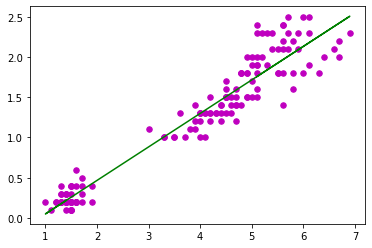

In [7]:
import matplotlib.pyplot as plt

plt.scatter(petallen, petalwid,color = "m",
               marker = "o", s = 30)
y_pred = b_0 + b_1*x
plt.plot(x, y_pred, color = "g")


plot.show()

* calculating:
    - SSR
    - TSS
    - SSE
    - MSE
    - MSR
    

In [8]:
SSR = b_1 * SS_xy
print("SSR: ",SSR)

SSR:  80.43624138541065


In [9]:
TSS = SS_yy
print("TSS: ",TSS)

TSS:  86.7797333333331


In [10]:
SSE = TSS - SSR
print("SSE: ",SSE)

SSE:  6.343491947922445


In [11]:
dof = n-2  #degree of freedom
MSE = SSE/dof
print("MSE: ",MSE)

MSE:  0.04286143208055706


In [12]:
MSR = SSR/1
print("MSR: ",MSR)

MSR:  80.43624138541065


* confidence interval for b_1

In [13]:
from scipy import stats
#find confidence interval for b_1
# alpha is 0.05
v = len(x)-2 #120-2 = 118
t = stats.t.ppf(1-0.025, v)
S2 = SSE/(v) #s^2
S = S2**0.5
Sx = SS_xx**0.5
print("confidence interval for b_1 is:[",b_1 - t*(S/Sx),",",b_1 + t*(S/Sx),"]")

#another formula for b_1's confindence interval:
#print("confidence interval for b_1 is:[",b_1 - t*((MSE/SS_xx)**0.5),",",b_1 + t*((MSE/SS_xx)**0.5),"]") 


confidence interval for b_1 is:[ 0.39742357711583054 , 0.435414687454974 ]


* confidence interval for b_0

In [14]:
alpha = 0.05
n = len(x)
v = len(x)-2 #120-2 = 118
t = stats.t.ppf(1-alpha/2, v)
# m_x is mean of x
print("confidence interval is:[", b_0 - t*S*((1/n + (m_x**2)/SS_xx)**0.5),",",b_0 + t*S*((1/n + (m_x**2)/SS_xx)**0.5),"]")


confidence interval is:[ -0.44533987741004477 , -0.2876882130234204 ]


* prediction interval
<br>
prediction interval for value 1.6 
means petallength is 1.6 , what is prediction interval for its petalwidth?

In [15]:
print("for petal length ",x[46]," we will find a prediction interval for its petal width. and the real value for petal width is ",y[46])
alpha = 0.1
n = len(x)
v = n-2 #120-2 = 118
t = stats.t.ppf(1-alpha/2, v)
X = 1 + 1/n + ((x[46]-m_x)**2)/SS_xx
S = MSE**0.5
print("prediction interval is:[ ",b_0 + b_1*x[46] - t * S * X**0.5 , ",",b_0 + b_1*x[46] + t * S * X**0.5," ]")

for petal length  1.6  we will find a prediction interval for its petal width. and the real value for petal width is  0.2
prediction interval is:[  -0.04577416405528023 , 0.6452872969351025  ]


In [16]:
from tabulate import tabulate
 

F = MSR/MSE
table = [
    ['source' , 'df' , 'SS' , 'MS' , 'F'],
    ['regression',1 , SSR , MSR, F],
    ['error' ,n-2 , SSE , MSE],
    ['total' ,n-1 , SS_yy]
]
# display table
print(tabulate(table))

----------  ---  -----------------  -------------------  ------------------
source      df   SS                 MS                   F
regression  1    80.43624138541065  80.43624138541065    1876.6578128848475
error       148  6.343491947922445  0.04286143208055706
total       149  86.7797333333331
----------  ---  -----------------  -------------------  ------------------


# hartley test for homogeneity of variance

In [17]:
sepallength = pd.DataFrame(df['sepallength'].values)
sepalwidth = pd.DataFrame(df['sepalwidth'].values)


#converting to list
sepallen = []
for i in range(len(sepallength)):
    sepallen.append(sepallength[0][i])
    
    
#converting to list
sepalwid = []
for i in range(len(sepalwidth)):
    sepalwid.append(sepalwidth[0][i])

In [18]:
t1 = sepallen[0:150] 
t2 = sepalwid[0:150]
t3 = petallen[0:150]
t4 = petalwid[0:150]



* now: 
    - sepallenght is in t1
    - sepal width is in t2
    - petal length is in t3
    - petal width is in t4


In [19]:
import scipy
from scipy import stats
t1_v = np.var(t1)
t2_v = np.var(t2)
t3_v = np.var(t3)
t4_v = np.var(t4)
s2min = min(t1_v , t2_v , t3_v , t4_v)
s2max = max(t1_v , t2_v , t3_v , t4_v)
f = s2max/s2min
alpha = 0.05
k=4

# F = scipy.stats.f.ppf(alpha , v1 , v2)
v2 = n-1
v1 = k
F = scipy.stats.f.ppf(1-alpha , k , n-1)
#if f>F : فرض همگنی واریانس ها را رد میکنیم

print("f:",f)
print("F:",F)

if(f>F):
    print("variances are not equal and we can not do the ANOVA test")
else:
    print("variances are equal")







f: 16.559110305124598
F: 2.432373638384786
variances are not equal and we can not do the ANOVA test
